In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import renom as rm
from renom.optimizer import Adam

from renom_rg.api.regression.gcnn import GCNet
from renom_rg.api.utility.feature_graph import get_corr_graph, get_kernel_graph, get_dbscan_graph

np.random.seed(1984)

In [2]:
batch_size = 16
epochs = 100
fc_unit = (100, 50)
channels = (10, 20, 20)
neighbors = 5
gamma = 0.1

In [3]:
boston_data = load_boston()

X = boston_data.data
y = boston_data.target.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
# feature_graph = get_corr_graph(X_train, neighbors)
# feature_graph = get_kernel_graph(X_train, neighbors, gamma)
feature_graph = get_dbscan_graph(X_train, neighbors)

In [5]:
network = GCNet(feature_graph=feature_graph, num_target=y_train.shape[1], neighbors=neighbors, fc_unit=fc_unit, channels=channels)
optimizer = Adam()

learning_curve = []
test_curve = []

for i in range(epochs):
    N = X_train.shape[0]
    perm = np.random.permutation(N)
    loss = 0
    bar = tqdm(range(N//batch_size))
    for j in bar:
        index = perm[j*batch_size:(j+1)*batch_size]
        train_batch_x = X_train[index].reshape(-1, 1, X_train.shape[1], 1)
        train_batch_y = y_train[index]

        # Loss function
        network.set_models(inference=False)
        with network.train():
            l = rm.mse(network(train_batch_x), train_batch_y)

        # Back propagation
        grad = l.grad()

        # Update
        grad.update(optimizer)
        loss += l.as_ndarray()
        bar.set_description("epoch: {} loss: {}".format(i, l.as_ndarray()))
        bar.update(1)
        
    train_loss = loss / (N//batch_size)
    learning_curve.append(train_loss)

    # Validation
    network.set_models(inference=True)
    N = X_test.shape[0]
    
    pred = network(X_test.reshape(-1, 1, X_test.shape[1], 1))
    test_loss = rm.mse(pred, y_test)
    test_curve.append(test_loss)
    print("epoch:{} train_loss: {} test_loss: {}".format(i, train_loss, test_loss))
    print("epoch {} R2:{}".format(i, r2_score(y_test, pred)))

epoch: 1 loss: 43.44557189941406:  48%|████▊     | 12/25 [00:00<00:00, 68.70it/s]

epoch:0 train_loss: 94.53899505615234 test_loss: 27.04543685913086
epoch 0 R2:0.25890586120321946


epoch: 2 loss: 13.226627349853516:  52%|█████▏    | 13/25 [00:00<00:00, 70.64it/s]

epoch:1 train_loss: 34.12525588989258 test_loss: 22.27334976196289
epoch 1 R2:0.38966973488492596


epoch: 3 loss: 6.283029556274414:  44%|████▍     | 11/25 [00:00<00:00, 58.70it/s] 

epoch:2 train_loss: 28.277129650115967 test_loss: 16.114513397216797
epoch 2 R2:0.5584330161085749


epoch: 4 loss: 4.187381267547607:  48%|████▊     | 12/25 [00:00<00:00, 65.13it/s] 

epoch:3 train_loss: 18.920757675170897 test_loss: 12.107988357543945
epoch 3 R2:0.668219132340403


epoch: 5 loss: 11.427068710327148:  44%|████▍     | 11/25 [00:00<00:00, 59.09it/s]

epoch:4 train_loss: 16.191974563598635 test_loss: 10.478751182556152
epoch 4 R2:0.712863144045156


epoch: 6 loss: 6.180157661437988:  48%|████▊     | 12/25 [00:00<00:00, 64.69it/s] 

epoch:5 train_loss: 12.033384132385255 test_loss: 10.463835716247559
epoch 5 R2:0.7132718804785028


epoch: 7 loss: 8.006887435913086:  48%|████▊     | 12/25 [00:00<00:00, 68.15it/s]

epoch:6 train_loss: 14.264813251495362 test_loss: 9.506078720092773
epoch 6 R2:0.7395161621040575


epoch: 8 loss: 3.6897199153900146:  48%|████▊     | 12/25 [00:00<00:00, 68.85it/s]

epoch:7 train_loss: 10.576036128997803 test_loss: 9.583282470703125
epoch 7 R2:0.7374006648093104


epoch: 9 loss: 6.810890197753906:  52%|█████▏    | 13/25 [00:00<00:00, 71.62it/s] 

epoch:8 train_loss: 9.711231937408447 test_loss: 9.272303581237793
epoch 8 R2:0.7459220430682535


epoch: 10 loss: 6.739588737487793:  52%|█████▏    | 13/25 [00:00<00:00, 70.70it/s] 

epoch:9 train_loss: 9.202827625274658 test_loss: 9.328173637390137
epoch 9 R2:0.7443911153267935


epoch: 11 loss: 5.234095573425293:  52%|█████▏    | 13/25 [00:00<00:00, 71.25it/s]

epoch:10 train_loss: 10.868901090621948 test_loss: 10.43420124053955
epoch 10 R2:0.714083936559959


epoch: 12 loss: 8.621431350708008:  48%|████▊     | 12/25 [00:00<00:00, 69.49it/s] 

epoch:11 train_loss: 10.113051614761353 test_loss: 9.721037864685059
epoch 11 R2:0.7336259141089969


epoch: 13 loss: 6.947850227355957:  48%|████▊     | 12/25 [00:00<00:00, 70.61it/s]

epoch:12 train_loss: 9.148523759841918 test_loss: 10.591647148132324
epoch 12 R2:0.7097695808696782


epoch: 14 loss: 13.351285934448242:  48%|████▊     | 12/25 [00:00<00:00, 66.30it/s]

epoch:13 train_loss: 9.17715591430664 test_loss: 9.43548583984375
epoch 13 R2:0.741450559368364


epoch: 15 loss: 10.61121654510498:  48%|████▊     | 12/25 [00:00<00:00, 70.82it/s] 

epoch:14 train_loss: 8.55473991394043 test_loss: 9.51526165008545
epoch 14 R2:0.7392645056586409


epoch: 16 loss: 4.787276268005371:  48%|████▊     | 12/25 [00:00<00:00, 67.20it/s] 

epoch:15 train_loss: 8.9219775390625 test_loss: 9.363045692443848
epoch 15 R2:0.7434355384313218


epoch: 17 loss: 5.141005039215088:  52%|█████▏    | 13/25 [00:00<00:00, 71.05it/s] 

epoch:16 train_loss: 8.73701431274414 test_loss: 11.955965042114258
epoch 16 R2:0.6723848641610997


epoch: 18 loss: 5.211221694946289:  40%|████      | 10/25 [00:00<00:00, 63.19it/s]

epoch:17 train_loss: 8.777020950317382 test_loss: 10.23204517364502
epoch 17 R2:0.7196233809984335


epoch: 19 loss: 4.222689628601074:  52%|█████▏    | 13/25 [00:00<00:00, 70.74it/s] 

epoch:18 train_loss: 7.598101711273193 test_loss: 8.418601989746094
epoch 18 R2:0.7693150016675013


epoch: 20 loss: 11.973586082458496:  48%|████▊     | 12/25 [00:00<00:00, 70.84it/s]

epoch:19 train_loss: 7.555452356338501 test_loss: 11.244534492492676
epoch 19 R2:0.6918793299977255


epoch: 21 loss: 12.2765531539917:  48%|████▊     | 12/25 [00:00<00:00, 68.94it/s] 

epoch:20 train_loss: 7.431867837905884 test_loss: 11.83903980255127
epoch 20 R2:0.6755887433950418


epoch: 22 loss: 8.759639739990234:  48%|████▊     | 12/25 [00:00<00:00, 66.92it/s]

epoch:21 train_loss: 8.081334991455078 test_loss: 11.052265167236328
epoch 21 R2:0.6971478044767437


epoch: 23 loss: 6.059267520904541:  48%|████▊     | 12/25 [00:00<00:00, 69.55it/s]

epoch:22 train_loss: 6.859370985031128 test_loss: 10.271027565002441
epoch 22 R2:0.7185551910667566


epoch: 24 loss: 9.847818374633789:  48%|████▊     | 12/25 [00:00<00:00, 67.28it/s]

epoch:23 train_loss: 7.672237100601197 test_loss: 9.992502212524414
epoch 23 R2:0.7261872442215792


epoch: 25 loss: 3.960655689239502:  44%|████▍     | 11/25 [00:00<00:00, 61.19it/s] 

epoch:24 train_loss: 6.588662643432617 test_loss: 11.636954307556152
epoch 24 R2:0.6811262732858891


epoch: 26 loss: 2.5469393730163574:  48%|████▊     | 12/25 [00:00<00:00, 68.14it/s]

epoch:25 train_loss: 7.311475472450256 test_loss: 11.281231880187988
epoch 25 R2:0.6908736793218673


epoch: 27 loss: 11.913904190063477:  48%|████▊     | 12/25 [00:00<00:00, 70.09it/s]

epoch:26 train_loss: 7.050693445205688 test_loss: 11.72367000579834
epoch 26 R2:0.6787501269803069


epoch: 28 loss: 2.7352406978607178:  48%|████▊     | 12/25 [00:00<00:00, 69.40it/s]

epoch:27 train_loss: 5.982931337356567 test_loss: 9.487241744995117
epoch 27 R2:0.7400323158950313


epoch: 29 loss: 10.780967712402344:  48%|████▊     | 12/25 [00:00<00:00, 68.42it/s]

epoch:28 train_loss: 6.966649732589722 test_loss: 11.10342025756836
epoch 28 R2:0.6957461262905833


epoch: 30 loss: 5.127259254455566:  48%|████▊     | 12/25 [00:00<00:00, 67.61it/s]

epoch:29 train_loss: 6.575079135894775 test_loss: 9.2135591506958
epoch 29 R2:0.7475317386482715


epoch: 31 loss: 7.881691932678223:  44%|████▍     | 11/25 [00:00<00:00, 62.19it/s] 

epoch:30 train_loss: 6.344089422225952 test_loss: 10.455989837646484
epoch 30 R2:0.7134868686919217


epoch: 32 loss: 3.7891173362731934:  48%|████▊     | 12/25 [00:00<00:00, 65.26it/s]

epoch:31 train_loss: 6.2449207639694215 test_loss: 10.81399154663086
epoch 31 R2:0.7036769971431565


epoch: 33 loss: 5.190078258514404:  44%|████▍     | 11/25 [00:00<00:00, 61.71it/s] 

epoch:32 train_loss: 6.355053291320801 test_loss: 11.617534637451172
epoch 32 R2:0.6816584276505792


epoch: 34 loss: 4.711728096008301:  40%|████      | 10/25 [00:00<00:00, 52.63it/s]

epoch:33 train_loss: 6.463060693740845 test_loss: 10.264850616455078
epoch 33 R2:0.718724433050861


epoch: 35 loss: 3.486232280731201:  40%|████      | 10/25 [00:00<00:00, 65.19it/s]

epoch:34 train_loss: 7.3715047979354855 test_loss: 9.98691177368164
epoch 34 R2:0.7263404985556374


epoch: 36 loss: 13.089836120605469:  44%|████▍     | 11/25 [00:00<00:00, 63.08it/s]

epoch:35 train_loss: 7.677056822776795 test_loss: 13.274019241333008
epoch 35 R2:0.6362677530723059


epoch: 37 loss: 4.975950717926025:  48%|████▊     | 12/25 [00:00<00:00, 65.20it/s] 

epoch:36 train_loss: 7.3440132904052735 test_loss: 8.942625999450684
epoch 36 R2:0.7549557997395779


epoch: 38 loss: 5.887598037719727:  44%|████▍     | 11/25 [00:00<00:00, 63.79it/s] 

epoch:37 train_loss: 5.872401847839355 test_loss: 7.957395076751709
epoch 37 R2:0.7819529150736974


epoch: 39 loss: 2.897031307220459:  44%|████▍     | 11/25 [00:00<00:00, 65.02it/s] 

epoch:38 train_loss: 5.305633039474487 test_loss: 10.973623275756836
epoch 38 R2:0.699302752313868


epoch: 40 loss: 6.114095687866211:  48%|████▊     | 12/25 [00:00<00:00, 68.73it/s] 

epoch:39 train_loss: 6.043093185424805 test_loss: 9.608413696289062
epoch 39 R2:0.7367120056247259


epoch: 41 loss: 4.458423614501953:  48%|████▊     | 12/25 [00:00<00:00, 69.91it/s] 

epoch:40 train_loss: 6.66854416847229 test_loss: 8.405707359313965
epoch 40 R2:0.7696683347530815


epoch: 42 loss: 4.037945747375488:  48%|████▊     | 12/25 [00:00<00:00, 69.03it/s] 

epoch:41 train_loss: 6.358320608139038 test_loss: 9.970593452453613
epoch 41 R2:0.7267876298325018


epoch: 43 loss: 6.13102912902832:  44%|████▍     | 11/25 [00:00<00:00, 65.79it/s] 

epoch:42 train_loss: 5.860832147598266 test_loss: 8.02443790435791
epoch 42 R2:0.7801158278694862


epoch: 44 loss: 4.393975257873535:  44%|████▍     | 11/25 [00:00<00:00, 63.21it/s]

epoch:43 train_loss: 6.006646518707275 test_loss: 8.575109481811523
epoch 43 R2:0.765026424775705


epoch: 45 loss: 5.408518314361572:  44%|████▍     | 11/25 [00:00<00:00, 60.60it/s] 

epoch:44 train_loss: 6.023593254089356 test_loss: 11.93893051147461
epoch 44 R2:0.672851608023854


epoch: 46 loss: 6.174455165863037:  44%|████▍     | 11/25 [00:00<00:00, 60.33it/s]

epoch:45 train_loss: 5.336779341697693 test_loss: 9.822012901306152
epoch 45 R2:0.7308589900813945


epoch: 47 loss: 8.444389343261719:  40%|████      | 10/25 [00:00<00:00, 59.40it/s]

epoch:46 train_loss: 5.938579897880555 test_loss: 10.050195693969727
epoch 46 R2:0.724606328401889


epoch: 48 loss: 2.6241812705993652:  40%|████      | 10/25 [00:00<00:00, 60.76it/s]

epoch:47 train_loss: 5.7742085361480715 test_loss: 11.252264022827148
epoch 47 R2:0.6916674614305577


epoch: 49 loss: 4.756389617919922:  40%|████      | 10/25 [00:00<00:00, 58.29it/s]

epoch:48 train_loss: 5.436877374649048 test_loss: 12.107024192810059
epoch 48 R2:0.6682455331731898


epoch: 50 loss: 5.002699375152588:  48%|████▊     | 12/25 [00:00<00:00, 69.12it/s] 

epoch:49 train_loss: 5.970961608886719 test_loss: 9.727563858032227
epoch 49 R2:0.7334470831329325


epoch: 51 loss: 7.237242698669434:  52%|█████▏    | 13/25 [00:00<00:00, 71.76it/s] 

epoch:50 train_loss: 4.538886647224427 test_loss: 8.447518348693848
epoch 50 R2:0.7685226397211448


epoch: 52 loss: 4.643120765686035:  52%|█████▏    | 13/25 [00:00<00:00, 73.94it/s] 

epoch:51 train_loss: 4.880711526870727 test_loss: 8.684337615966797
epoch 51 R2:0.7620333795342666


epoch: 53 loss: 4.864965438842773:  56%|█████▌    | 14/25 [00:00<00:00, 75.16it/s] 

epoch:52 train_loss: 5.125003724098206 test_loss: 9.41551399230957
epoch 52 R2:0.7419978125608513


epoch: 54 loss: 2.822800397872925:  56%|█████▌    | 14/25 [00:00<00:00, 75.73it/s] 

epoch:53 train_loss: 4.501489453315735 test_loss: 9.024968147277832
epoch 53 R2:0.7526994577799672


epoch: 55 loss: 6.349444389343262:  44%|████▍     | 11/25 [00:00<00:00, 71.86it/s]

epoch:54 train_loss: 5.052263193130493 test_loss: 9.505834579467773
epoch 54 R2:0.7395228623720058


epoch: 56 loss: 2.381218671798706:  40%|████      | 10/25 [00:00<00:00, 58.70it/s]

epoch:55 train_loss: 4.93547194480896 test_loss: 7.344461917877197
epoch 55 R2:0.7987483934378106


epoch: 57 loss: 3.839268207550049:  44%|████▍     | 11/25 [00:00<00:00, 59.75it/s] 

epoch:56 train_loss: 5.284813108444214 test_loss: 9.75344181060791
epoch 56 R2:0.7327379879340727


epoch: 58 loss: 3.8377788066864014:  44%|████▍     | 11/25 [00:00<00:00, 64.60it/s]

epoch:57 train_loss: 5.644457025527954 test_loss: 7.2724928855896
epoch 57 R2:0.8007204698881464


epoch: 59 loss: 2.0449583530426025:  48%|████▊     | 12/25 [00:00<00:00, 66.19it/s]

epoch:58 train_loss: 5.067898135185242 test_loss: 9.940160751342773
epoch 58 R2:0.727621520112625


epoch: 60 loss: 6.063080787658691:  48%|████▊     | 12/25 [00:00<00:00, 67.35it/s] 

epoch:59 train_loss: 4.9054230690002445 test_loss: 9.633414268493652
epoch 59 R2:0.7360269524065232


epoch: 61 loss: 4.247404098510742:  48%|████▊     | 12/25 [00:00<00:00, 67.99it/s]

epoch:60 train_loss: 5.788884372711181 test_loss: 9.297706604003906
epoch 60 R2:0.7452259569353137


epoch: 62 loss: 4.459744453430176:  48%|████▊     | 12/25 [00:00<00:00, 65.44it/s]

epoch:61 train_loss: 4.882925839424133 test_loss: 8.448725700378418
epoch 61 R2:0.7684895770008222


epoch: 63 loss: 3.3328514099121094:  48%|████▊     | 12/25 [00:00<00:00, 67.89it/s]

epoch:62 train_loss: 5.0581425762176515 test_loss: 9.520912170410156
epoch 62 R2:0.7391096874736235


epoch: 64 loss: 5.28955602645874:  48%|████▊     | 12/25 [00:00<00:00, 63.61it/s]  

epoch:63 train_loss: 4.364091358184814 test_loss: 8.352497100830078
epoch 63 R2:0.7711263837669097


epoch: 65 loss: 5.215691566467285:  48%|████▊     | 12/25 [00:00<00:00, 67.64it/s] 

epoch:64 train_loss: 5.126400032043457 test_loss: 9.645156860351562
epoch 64 R2:0.7357051740044592


epoch: 66 loss: 5.146793365478516:  48%|████▊     | 12/25 [00:00<00:00, 68.38it/s]

epoch:65 train_loss: 5.1567206287384035 test_loss: 7.530951976776123
epoch 65 R2:0.7936382529597115


epoch: 67 loss: 3.5380609035491943:  48%|████▊     | 12/25 [00:00<00:00, 68.19it/s]

epoch:66 train_loss: 4.727604167461395 test_loss: 8.703082084655762
epoch 66 R2:0.7615197356277177


epoch: 68 loss: 3.8360354900360107:  48%|████▊     | 12/25 [00:00<00:00, 65.53it/s]

epoch:67 train_loss: 4.137969799041748 test_loss: 7.935204982757568
epoch 67 R2:0.7825609702311747


epoch: 69 loss: 3.4512007236480713:  48%|████▊     | 12/25 [00:00<00:00, 65.51it/s]

epoch:68 train_loss: 4.276676449775696 test_loss: 6.511695384979248
epoch 68 R2:0.8215677106461229


epoch: 70 loss: 7.512424945831299:  48%|████▊     | 12/25 [00:00<00:00, 67.16it/s]

epoch:69 train_loss: 6.070770263671875 test_loss: 9.572772026062012
epoch 69 R2:0.7376886363214967


epoch: 71 loss: 6.401569843292236:  44%|████▍     | 11/25 [00:00<00:00, 55.48it/s]

epoch:70 train_loss: 5.191827001571656 test_loss: 8.502551078796387
epoch 70 R2:0.7670146511728683


epoch: 72 loss: 3.96304988861084:  48%|████▊     | 12/25 [00:00<00:00, 66.89it/s]  

epoch:71 train_loss: 4.749740905761719 test_loss: 6.493863582611084
epoch 71 R2:0.8220563174932937


epoch: 73 loss: 3.4010813236236572:  48%|████▊     | 12/25 [00:00<00:00, 65.82it/s]

epoch:72 train_loss: 4.52126639842987 test_loss: 8.543708801269531
epoch 72 R2:0.7658868627726152


epoch: 74 loss: 3.626668691635132:  44%|████▍     | 11/25 [00:00<00:00, 65.16it/s]

epoch:73 train_loss: 4.770923318862915 test_loss: 8.0250883102417
epoch 73 R2:0.7800980113887961


epoch: 75 loss: 2.995285749435425:  48%|████▊     | 12/25 [00:00<00:00, 65.01it/s]

epoch:74 train_loss: 5.1652614116668705 test_loss: 10.781532287597656
epoch 74 R2:0.7045664193221539


epoch: 76 loss: 5.681670665740967:  44%|████▍     | 11/25 [00:00<00:00, 64.96it/s]

epoch:75 train_loss: 5.028671236038208 test_loss: 9.033896446228027
epoch 75 R2:0.7524548570352412


epoch: 77 loss: 2.780874013900757:  44%|████▍     | 11/25 [00:00<00:00, 66.60it/s] 

epoch:76 train_loss: 4.444488430023194 test_loss: 6.935039043426514
epoch 76 R2:0.8099673368933678


epoch: 78 loss: 3.9006693363189697:  48%|████▊     | 12/25 [00:00<00:00, 63.23it/s]

epoch:77 train_loss: 4.532547974586487 test_loss: 6.416309833526611
epoch 77 R2:0.8241814288502822


epoch: 79 loss: 3.5576515197753906:  48%|████▊     | 12/25 [00:00<00:00, 64.41it/s]

epoch:78 train_loss: 4.216174974441528 test_loss: 7.576026916503906
epoch 78 R2:0.7924031000240788


epoch: 80 loss: 4.644181251525879:  48%|████▊     | 12/25 [00:00<00:00, 66.75it/s] 

epoch:79 train_loss: 4.164245014190674 test_loss: 6.523825645446777
epoch 79 R2:0.8212353273578287


epoch: 81 loss: 3.579960346221924:  44%|████▍     | 11/25 [00:00<00:00, 62.93it/s] 

epoch:80 train_loss: 4.253937644958496 test_loss: 9.324179649353027
epoch 80 R2:0.7445005180072273


epoch: 82 loss: 1.8711942434310913:  40%|████      | 10/25 [00:00<00:00, 54.48it/s]

epoch:81 train_loss: 4.7513030242919925 test_loss: 8.624735832214355
epoch 81 R2:0.7636665596547083


epoch: 83 loss: 2.1952290534973145:  44%|████▍     | 11/25 [00:00<00:00, 64.26it/s]

epoch:82 train_loss: 3.98131076335907 test_loss: 8.651581764221191
epoch 82 R2:0.7629309213351662


epoch: 84 loss: 2.957632064819336:  48%|████▊     | 12/25 [00:00<00:00, 67.13it/s]

epoch:83 train_loss: 4.0725572681427 test_loss: 6.743378162384033
epoch 83 R2:0.8152191914868315


epoch: 85 loss: 2.528261661529541:  48%|████▊     | 12/25 [00:00<00:00, 65.98it/s] 

epoch:84 train_loss: 3.856985402107239 test_loss: 7.970259666442871
epoch 84 R2:0.7816004104885649


epoch: 86 loss: 4.626307010650635:  48%|████▊     | 12/25 [00:00<00:00, 67.79it/s] 

epoch:85 train_loss: 3.8067881298065185 test_loss: 8.020936012268066
epoch 85 R2:0.7802117905884646


epoch: 87 loss: 3.2213995456695557:  44%|████▍     | 11/25 [00:00<00:00, 63.21it/s]

epoch:86 train_loss: 3.6825762128829957 test_loss: 8.292977333068848
epoch 86 R2:0.7727573666488333


epoch: 88 loss: 5.14499044418335:  48%|████▊     | 12/25 [00:00<00:00, 65.21it/s]  

epoch:87 train_loss: 3.9087616920471193 test_loss: 8.926007270812988
epoch 87 R2:0.7554111890418234


epoch: 89 loss: 3.4755749702453613:  48%|████▊     | 12/25 [00:00<00:00, 64.95it/s]

epoch:88 train_loss: 4.215837020874023 test_loss: 6.090689659118652
epoch 88 R2:0.8331040193800013


epoch: 90 loss: 2.305109977722168:  44%|████▍     | 11/25 [00:00<00:00, 64.77it/s] 

epoch:89 train_loss: 4.051049928665162 test_loss: 6.746284008026123
epoch 89 R2:0.8151395520924403


epoch: 91 loss: 7.156847953796387:  44%|████▍     | 11/25 [00:00<00:00, 63.08it/s]

epoch:90 train_loss: 3.843043465614319 test_loss: 6.712209224700928
epoch 90 R2:0.8160732867161691


epoch: 92 loss: 4.78337287902832:  44%|████▍     | 11/25 [00:00<00:00, 62.57it/s] 

epoch:91 train_loss: 4.845198173522949 test_loss: 6.965920925140381
epoch 91 R2:0.8091211248365747


epoch: 93 loss: 2.08743953704834:  40%|████      | 10/25 [00:00<00:00, 64.51it/s] 

epoch:92 train_loss: 4.331126384735107 test_loss: 6.412116050720215
epoch 92 R2:0.8242963745999841


epoch: 94 loss: 4.888843536376953:  44%|████▍     | 11/25 [00:00<00:00, 60.11it/s] 

epoch:93 train_loss: 3.7767120599746704 test_loss: 6.549198150634766
epoch 93 R2:0.8205400844193387


epoch: 95 loss: 2.0327072143554688:  48%|████▊     | 12/25 [00:00<00:00, 65.52it/s]

epoch:94 train_loss: 3.88444571018219 test_loss: 7.007735252380371
epoch 94 R2:0.8079753107324321


epoch: 96 loss: 4.402754783630371:  40%|████      | 10/25 [00:00<00:00, 61.86it/s]

epoch:95 train_loss: 4.288653616905212 test_loss: 7.679313659667969
epoch 95 R2:0.7895728521591203


epoch: 97 loss: 2.510866403579712:  44%|████▍     | 11/25 [00:00<00:00, 58.24it/s] 

epoch:96 train_loss: 3.841830196380615 test_loss: 6.599560260772705
epoch 96 R2:0.8191600717533823


epoch: 98 loss: 3.576533317565918:  40%|████      | 10/25 [00:00<00:00, 57.60it/s]

epoch:97 train_loss: 3.4866698455810545 test_loss: 8.327149391174316
epoch 97 R2:0.7718209714970514


epoch: 99 loss: 2.9097931385040283:  36%|███▌      | 9/25 [00:00<00:00, 48.14it/s]

epoch:98 train_loss: 3.7795505714416504 test_loss: 6.704818248748779
epoch 98 R2:0.8162758108681202


epoch: 99 loss: 2.372926712036133: 100%|██████████| 25/25 [00:00<00:00, 56.25it/s] 

epoch:99 train_loss: 4.155116119384766 test_loss: 6.716757297515869
epoch 99 R2:0.8159486231814732


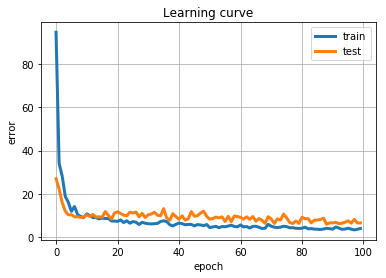

In [6]:
# Learning curve.
plt.plot(learning_curve, linewidth=3, label="train")
plt.plot(test_curve, linewidth=3, label="test")
plt.title("Learning curve")
plt.ylabel("error")
plt.xlabel("epoch")
plt.legend()
plt.grid()
plt.show()